シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求める。    中田真秀

シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求めるのがこのjupyter notebookの主題である。
教科書通り、イス型 (chair) 、半イス型 (half-chair) 、ボート型 (boat) 、ひずみボート型 (twist-boat) が得られた。
量子化学計算はGrimmeのGF2-xTB、コンフォーマーを求めるのはGrimmeらのcrest、遷移状態を求めるためにはZimmermanらのmoleculer GSMを用いた。

ただ、教科書通りというのには<a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>でも指摘されているように語弊がある。実際はボート型を経由しなくともシクロヘキサンの反転は行える。従って二通りの反転がある。一つ目は、ボート型を経由せず、歪みボート型から直接反転する反転。二つ目は、歪みボート型からボート型を経由する反転である。では、ボート型を経由した反転はそれを経由しない反転とどう違うのだろうか。その答えは、シクロヘキサンが炭素骨格が全体的に捩じれ反転する、である。一つの炭素のエカトリアルとアキシアル位の水素が反転する、ではない。<a href="https://www.youtube.com/watch?v=eDvqn65F5r4">例えば、この動画はよくある解説なのであるが、明確に間違っている</a>。もしとるとすると遷移状態は正六角型を経ることになる。動画の説明では一つの炭素のみが動くことになっているが、これは非常にエネルギーとしては高い状態になるはずだ。正解は、炭素骨格はそのねじりを利用しつつコンフォームを変更する、である。おそらく水素原子のエカトリアルとアキシアル位の"移動"にかかるエネルギーを最小にするためであろう。そして、このボート型へのエネルギー障壁は1～2kcal/molと小さいので、ボート型を経由する、しない、どちらの反転も通常起こっている。

歪みボート型の60度のねじりは鏡像反転とも関連付けられる。お互いはお互いの鏡像関係にある。ただし原子の順番が違っている。

ぜひ、ノートの再現に必要なファイルたちダウンロードして手元の環境で実行して、コンフォーマーの形および安定構造間の構造変化アニメーションを見ていただきたい。残念ながらgithubでは分子を一切見ることができなかった。

簡易再現
<pre>
$ pip3 pip install jupyter_jsmol
$ https://github.com/nakatamaho/quantumchemistry_notebook.git
$ cd cyclohexane
</pre>
このチェックアウトにあるcyclohexane.ipynbをjupyter-notebookで閲覧すればよい。"!"が先頭に来ているshell scriptのところ以外を適宜実行すると、例えば、In[2]を実行してみると分子を見ることができる。マウスで動かすことも可能である。

推奨環境
<ul>
    <li> Linux Centos 7
    <li> Docker on Windows/Mac/Linux
</ul>

必要なソフト
<ul>
    <li>  <a href="https://github.com/grimme-lab/xtb">xtb semiemprical tight binding DFT</a>    
    <li> <a href="https://github.com/grimme-lab/crest">crest (linux binaryのみ)</a>    
    <li> <a href="https://github.com/ZimmermanGroup/molecularGSM">code for single-ended and double-ended molecular GSM </a>
    <li> <a href="http://openbabel.org/wiki/Main_Page">Open Babel</a>
    <li> <a href="https://pymol.org/2/">pymol</a> (ボート型の遷移状態を求めるために必要)
    <li> <a href="https://github.com/charnley/rmsd">Calculate Root-mean-square deviation (RMSD) of Two Molecules Using Rotation</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>
</ul>

参考文献
<ul>
<li> <a href="https://en.wikipedia.org/wiki/Cyclohexane_conformation">Cyclohexane conformation</a>
<li> <a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>
<li> <a href="https://pubs.acs.org/doi/10.1021/j100377a041">Ab initio conformational analysis of cyclohexane</a>
</ul>


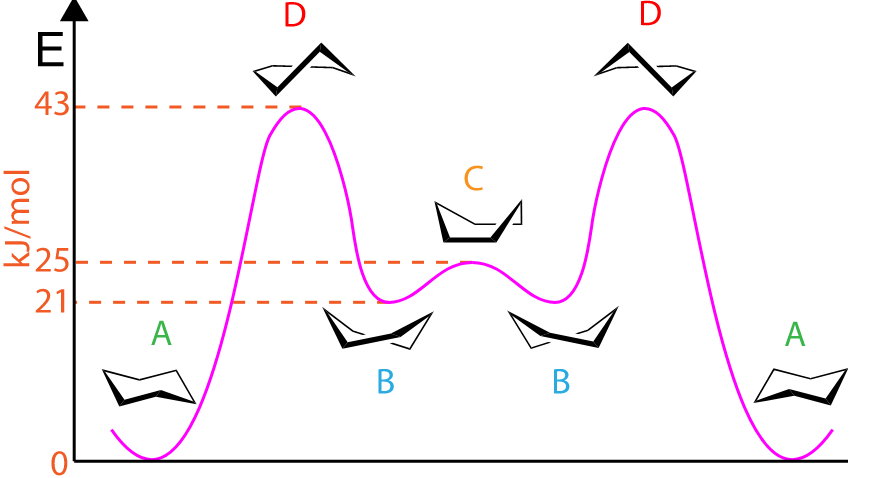

Open Babelでcyclohexaneの三次元構造を生成

In [1]:
!obabel -:"C1CCCCC1" --gen3d -h -o xyz -Ocyclohexane.xyz

1 molecule converted


ここではイス型が得られた。以下でjsmolを使えるようにしておく

In [2]:
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
view = JsmolView.from_file("cyclohexane.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

xtbで構造最適化する。これは数秒で終わる(Core i7 4790K, CentOS 7 docker, Windows10)

In [3]:
!/usr/bin/time xtb cyclohexane.xyz --opt

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.3.2 (unknown-commit) compiled by '@Linux' on 09/23/2020

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; withou

 Shifting diagonal of input Hessian by    1.4542033194853091E-003
 Lowest  eigenvalues of input Hessian
    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
    0.010000    0.010009    0.018878    0.020416    0.025148    0.025177
    0.051133    0.052140    0.052220    0.052470    0.052553    0.055583
 Highest eigenvalues
    1.183759    1.184717    1.205342    1.221558    1.272795    1.274007


........................................................................
.............................. CYCLE    1 ..............................
........................................................................
   1    -19.2609215 -0.192609E+02  0.700E-06   13.57       0.0  T
   2    -19.2609215 -0.518696E-12  0.321E-06   13.57    7342.4  T
   3    -19.2609215 -0.355271E-13  0.191E-06   13.57   12329.7  T
     SCC iter.                  ...        0 min,  0.350 sec
     gradient                   ...        0 min,  0.018 sec
 * total energy  :   -18.9861314 Eh     ch

   3    -19.2676489 -0.106581E-12  0.412E-06   13.66    5724.3  T

   *** convergence criteria satisfied after 3 iterations ***

         #    Occupation            Energy/Eh            Energy/eV
      -------------------------------------------------------------
         1        2.0000           -0.6290436             -17.1171
       ...           ...                  ...                  ...
        12        2.0000           -0.4614201             -12.5559
        13        2.0000           -0.4614130             -12.5557
        14        2.0000           -0.4340125             -11.8101
        15        2.0000           -0.4340108             -11.8100
        16        2.0000           -0.4167635             -11.3407
        17        2.0000           -0.4091714             -11.1341
        18        2.0000           -0.4091615             -11.1339 (HOMO)
        19                          0.0927810               2.5247 (LUMO)
        20                          0.1022818       


------------------------------------------------------------------------
 * finished run on 2020/09/27 at 13:12:59.249     
------------------------------------------------------------------------
 total:
 * wall-time:     0 d,  0 h,  0 min,  3.475 sec
 *  cpu-time:     0 d,  0 h,  0 min, 26.016 sec
 * ratio c/w:     7.486 speedup
 SCF:
 * wall-time:     0 d,  0 h,  0 min,  0.552 sec
 *  cpu-time:     0 d,  0 h,  0 min,  4.201 sec
 * ratio c/w:     7.613 speedup
 ANC optimizer:
 * wall-time:     0 d,  0 h,  0 min,  2.764 sec
 *  cpu-time:     0 d,  0 h,  0 min, 21.084 sec
 * ratio c/w:     7.628 speedup

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
6.57user 19.46system 0:03.49elapsed 745%CPU (0avgtext+0avgdata 47076maxresident)k
0inputs+0outputs (0major+3092minor)pagefaults 0swaps


In [4]:
!mv xtbopt.xyz cyclohexane.xtbopt.xyz

In [5]:
view = JsmolView.from_file("cyclohexane.xtbopt.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

ここでもイス型が得られた。初期構造がイス型なので当然だと思われる。

crestでコンフォーマーを求める。これは13-15分かかる(Core i7 4790K, CentOS 7 docker, Windows10)

In [6]:
!/usr/bin/time crest cyclohexane.xtbopt.xyz 

 
       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |       based on the GFNn-xTB methods        |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.10.2, Tue 9. Jun 13:32:10 CEST 2020
       Using the xTB program.
       Compatible with XTB version 6.1 and later.
 
   Cite work conducted with this code as

   P. Pracht, F. Bohle, S. Grimme, PCCP, 2020, 22, 7169-7192.

   and

   S. Grimme, JCTC, 2019, 15, 2847-2862.
 
   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

 Command line input:
 > crest cyclohexane.xtbopt.xyz

  # threads =           1
-------------------------
Starting z-matrix sorting
-------

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 
 -----------------
 Wall Time Summary
 -----------------
             test MD wall time :         0h : 0m : 3s
                 MTD wall time :         0h : 6m :33s
      multilevel OPT wall time :         0h : 6m :35s
                  MD wall time :         0h : 1m :11s
                  GC wall time :         0h : 0m : 3s
--------------------
Overall wall time  : 0h :14m :29s
 
 CREST terminated normally.
642.25user 35.54system 14:30.90elapsed 77%CPU (0avgtext+0avgdata 25824maxresident)k
0inputs+0outputs (0major+13450597minor)pagefaults 0swaps


crestが正常終了すると、コンフォーマーがxyzフォーマットで二つ出てくるため、それを分割しておく。

In [7]:
!python3 splitxyz.py crest_conformers.xyz cyclohexane.crest

output: cyclohexane.crest.0000.xyz 
output: cyclohexane.crest.0001.xyz 


In [8]:
view = JsmolView.from_file("cyclohexane.crest.0000.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

crestでコンフォーマー求めたらイス型と歪みボート型が得られた。これらは(局所)最適構造となっている。

In [9]:
view = JsmolView.from_file("cyclohexane.crest.0001.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [10]:
!cp cyclohexane.crest.0001.xyz cyclohexane.twistboat.xtb.xyz
!cp cyclohexane.crest.0000.xyz cyclohexane.chair.xtb.xyz

イス型と歪みボート型は局所安定構造で、それらをつなぐ遷移状態の半イス型が存在する。これを求めてみよう。
これには、https://xtb-docs.readthedocs.io/en/latest/gsm.html を用いる。gsm_xtb.tgzはGrimme先生からもらう必要がある。が、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane に置いておいた。このバイナリを走らせるためには、<a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>と<a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>が必要となる。

In [11]:
!tar xvfz gsm_xtb.tgz
!cp inpfileq inpfileq_org

./
./tm2orca.py
./start.xyz
./.fitpar2
./inpfileq
./scratch/
./scratch/initial0000.xyz
./gsm.orca
./end.xyz
./ograd


In [12]:
!sed -i -e "2d" cyclohexane.chair.xtb.xyz
!sed -i -e "2d" cyclohexane.twistboat.xtb.xyz
!sed -i -e "2i\ " cyclohexane.chair.xtb.xyz
!sed -i -e "2i\ " cyclohexane.twistboat.xtb.xyz
!calculate_rmsd -p cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > l ; mv l cyclohexane.twistboat.xtb.xyz
!cat cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cp inpfileq_org inpfileq
!sed -i 's/^NNODES.*$/NNODES     35/' inpfileq
!sed -i 's/^MIN_SPACING.*$/MIN_SPACING   2.0/' inpfileq
!cat inpfileq

  18
 
 C         -0.7020800592       -1.2656449302        0.2415158794
 C          0.7450466090       -1.2407311416       -0.2416035425
 C          1.4471583405        0.0248196683        0.2417166467
 C          0.7020356005        1.2655350876       -0.2417358523
 C         -0.7449874013        1.2408116210        0.2416513596
 C         -1.4471551022       -0.0247726700       -0.2415280296
 H         -1.4798682036       -0.0252910222       -1.3337318095
 H         -2.4763662010       -0.0424108615        0.1238287018
 H         -0.7615676089        1.2687023205        1.3338945596
 H         -1.2749755297        2.1234007481       -0.1234257797
 H          0.7176683762        1.2936251397       -1.3339496124
 H          1.2014704703        2.1658719503        0.1230138970
 H          1.4794026704        0.0254146714        1.3339083866
 H          2.4765322199        0.0424249029       -0.1231999847
 H          0.7617952238       -1.2684790279       -1.3338472525
 H          1.2750

GSMで遷移状態を求める。7分程度かかった(Core i7 4790K, CentOS 7 docker, Windows10)

In [13]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 2
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 35
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad i


 growing iter: 4 
 adding node: 4 between 3 31 
 iR,iP: 3 31 iN: 4  dqmag: 0.99 dq0[constraint]: -0.04 
 initial Hint ev: 0.036 0.036 0.037 0.051
 adding node: 30 between 31 4 
 iR,iP: 31 4 iN: 30  dqmag: 0.99 dq0[constraint]: -0.04 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.53 0.52 0.52 0.53 2.71 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.71 0.53 0.52 0.52 0.53  disprms: 0.015 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling:

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 initial Hint ev: 0.036 0.036 0.037 0.050
 adding node: 26 between 27 8 
 iR,iP: 27 8 iN: 26  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.035 0.038 0.051
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.54 0.54 0.54 0.54 0.54 0.53 0.56 0.57 2.21 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.21 0.57 0.55 0.53 0.54 0.54 0.54 0.54 0.54  disprms: 0.042 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point except

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 0.13 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.49 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 1.05 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.008 (DMAX: 0.100) predE: -0.01  E(M): 1.76 gRMS: 0.0003 * 
 



 growing iter: 11 
 adding node: 11 between 10 24 
 iR,iP: 10 24 iN: 11  dqmag: 1.00 dq0[constraint]: -0.08 
 initial Hint ev: 0.035 0.036 0.037 0.050
 adding node: 23 between 24 11 
 iR,iP: 24 11 iN: 23  dqmag: 1.00 dq0[constraint]: -0.08 
 initial Hint ev: 0.035 0.035 0.037 0.051
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.55 0.55 0.55 0.55 0.55 0.54 0.54 0.54 0.56 0.57 0.57 1.71 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.71 0.56 0.57 0.55 0.54 0.54 0.54 0.55 0.55 0.55 0.55 0.55  disprms: 0.042 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are sign

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.001 (DMAX: 0.100) predE: -0.00  E(M): 0.14 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.51 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.005 (DMAX: 0.100) predE: -0.0


 
 Opt step:  1  gqc: 0.001 ss: 0.001 (DMAX: 0.100) predE: -0.00  E(M): 0.13 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.51 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 1.09 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 1.84 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.007 (DMAX: 0.100) predE: -0.00  E(M): 2.71 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 3.67 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.011 (DMAX: 0.100) predE: -0.01  E(M): 4.69 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.012 (DMAX: 0.100) predE: -0.01  E(M): 5.72 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.013 (DMAX: 0.100) predE: -0.01  E(M): 6.74 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.013 (DMAX: 0.100) predE: -0.01  E(M): 7.70 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.014 (DMAX: 0.100) predE: -0.02  E(M


 growing iter: 17 
 adding node: 17 between 16 18 
 iR,iP: 16 18 iN: 17  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.035 0.037 0.050
 gopt_iter: string done growing 
 writing grown string scratch/stringfile.xyz0000g 
 
 initial ic_reparam 
 TSn: 0 rpart:  0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: 0.00 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.02 disp[7]: 0.02 disp[8]: 0.03 disp[9]: 0.03 disp[10]: 0.04 disp[11]: 0.05 disp[12]: 0.05 disp[13]: 0.05 disp[14]: 0.05 disp[15]: 0.05 disp[16]: 0.05 disp[17]: -0.10 disp[18]: 0.09 disp[19]: -0.05 disp[20]: -0.05 disp[21]: -0.04 disp[22]: -0.04 disp[23]: -0.04 disp[24]: -0.03 disp[25]: -0.02 disp[26]: -0.02 disp[27]: -0.02 disp[28]: -0.01 disp[29]: -0.01 disp[30]: -0.01 disp[31]: -0.00 disp[32]: 0.00 disp[33]: 0.00
 disp[1]: -0.01 disp[2]: -0.01 disp[3]: -0.02 disp[4

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: 0.00 disp[14]: 0.00 disp[15]: 0.00 disp[16]: 0.00 disp[17]: -0.00 disp[18]: 0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00 disp[24]: -0.00 disp[25]: -0.00 disp[26]: -0.00 disp[27]: -0.00 disp[28]: -0.00 disp[29]: -0.00 disp[30]: -0.00 disp[31]: -0.00 disp[32]: -0.00 disp[33]: 0.00
 spacings (end ic_reparam, steps: 5):  0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.54 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53  disprms: 0.014 
 V_profile:  0.0 0.1 0.4 0.9 1.6 2.4 3.2 4.2 5.1 6.1 7.0 7.9 8.8 9.5 10.2 10.7 11.1 11.4 11.5 11.5 11.3 11.1 10.7 10.2 9.7 9.1 8.5 7.9 7.4 6.9 6.4 6.0 5.7 5.5 5.4
 3 way tangent (18): f1: 0.90 

 egnormal termination of xtb
Note: The following floating-point exceptions ar

 check_for_reaction wts: 0 wint: 34 isrxn: 0 

 opt_iters over: totalgrad: 0.077 gradrms: 0.0003 tgrads:  428  ol(0): 0.00 max E:  11.5 Erxn:  5.4 nmax: 18 TSnode: 18    -XTS- 

 oi: 18 nmax: 18 TSnode0: 18 overlapn: 0 
 string E (kcal/mol):  0.0 0.1 0.4 0.9 1.6 2.4 3.2 4.1 5.1 6.1 7.0 7.9 8.8 9.5 10.2 10.7 11.1 11.4 11.5 11.5 11.3 11.0 10.7 10.2 9.7 9.1 8.5 7.9 7.3 6.8 6.4 6.0 5.7 5.5 5.4 
 string E (au):  -18.98671586 -18.98653227 -18.98601992 -18.98521968 -18.98418683 -18.98295672 -18.98158156 -18.98010804 -18.97858228 -18.97704936 -18.97554966 -18.97411781 -18.97276099 -18.97156170 -18.97053328 -18.96968432 -18.96904058 -18.96860958 -18.96840847 -18.96843158 -18.96868536 -18.96911738 -18.96970208 -18.97044469 -18.97133736 -18.97225179 -18.97319713 -18.97414001 -18.97503696 -18.97581969 -18.97657050 -18.97720384 -18.97767563 -18.97800977 -18.97813290 
 string E (au) - force*distance:  -18.98671586 -18.98653227 -18.98601992 -18.98521968 -18.98418683 -18.98295672 -18.98158156 -18.9801

これで半イス型が得られた。半イスという割には座る部分は若干歪んでいるように見える。

In [14]:
!cp scratch/tsq0000.xyz cyclohexane.halfchair.xtb.xyz

In [15]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

アニメーションでみてみると、うまくいっていることがわかる。

In [16]:
!cp stringfile.xyz0000 cyclohexane.chair2twistboat.xtb.xyz

In [17]:
view = JsmolView()
display(view)
view.load('cyclohexane.chair2twistboat.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

歪みボート型と歪みボート型の遷移にはボート型を経由(遷移状態と)するはずで、それを求めてみる。
下図の歪みボート型と歪みボート型は鏡像関係にある。まず、どちらかをL, Rなどとしておき、Lのxyzファイルのy軸を変更した。次に
それだけでは原子の順番が適切ではないため、修正した。残念ながらすべてをスクリプトでは処理できなかったのでhttps://pubs.acs.org/doi/pdf/10.1021/ed074p813 のFigure2を参考にしつつ、pymolで比較しつつ、原子を入れ替えていった。

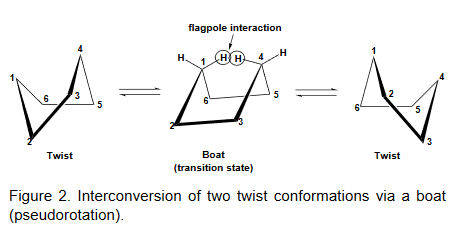

手で入れ替えた結果の二つのファイル、cyclohexane.twistboatL.xtb.xyz および cyclohexane.twistboatR.xtb.xyzは、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane から入手できる。

In [18]:
!cp cyclohexane.twistboat.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!python3 inverse_y.py cyclohexane.twistboatR.xtb.xyz > cyclohexane.twistboatL.xtb.xyz
!calculate_rmsd -e -p cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > l ; mv l cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatL_ok.xtb.xyz cyclohexane.twistboatL.xtb.xyz
!md5sum cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatR_ok.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!md5sum cyclohexane.twistboatR.xtb.xyz
!calculate_rmsd -p cyclohexane.twistboatL.xtb.xyz cyclohexane.twistboatR.xtb.xyz > l ; mv l cyclohexane.twistboatR.xtb.xyz

3a05a02f60a690e8ee93494bfa0742bd  cyclohexane.twistboatL.xtb.xyz
4a7525762ec53fe01f074673dd2b7f7c  cyclohexane.twistboatR.xtb.xyz


In [19]:
!rm -f ./scartch/initial0000.xyz
!cat cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cp inpfileq_org inpfileq
!sed -i 's/^MIN_SPACING.*$/MIN_SPACING   2.0/' inpfileq
!sed -i 's/^NNODES.*$/NNODES      35/' inpfileq
!cat inpfileq

18
cyclohexane.twistboatR.xtb.xyz - modified
C       0.70850546      1.33992685     -0.00026818
C      -0.75991726      1.13899099     -0.39521265
C      -1.36902641     -0.01340914      0.39529628
C      -0.70846108     -1.33997219     -0.00025240
C       0.75993354     -1.13891877     -0.39512590
C       1.36899956      0.01342832      0.39553705
H       2.44444954      0.06794139      0.21683669
H       1.22388782     -0.17552712      1.46089488
H       1.32035366     -2.05828419     -0.21589170
H       0.83491009     -0.91282929     -1.46048383
H      -1.24706231     -1.78651508     -0.83847542
H      -0.77449228     -2.03699678      0.83757389
H      -1.22414344      0.17565549      1.46065988
H      -2.44443255     -0.06792581      0.21639520
H      -0.83502911      0.91304028     -1.46057211
H      -1.32026432      2.05836349     -0.21583320
H       0.77472949      2.03709464      0.83742022
H       1.24720656      1.78626113     -0.83857239
18
cyclohexane.twistboatL.xtb.xyz - m

gsmで中間体を求めると一つ負の固有値が求まったので正しいと思われる。計算時間は5-10分程度必要であった。

In [20]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 2
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 35
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad i


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 
 Opt step:  1  gqc: 0.000 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.03 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.11 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.22 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.35 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.49 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.69 gRMS: 0.0006 ratio: 0.937 
 Opt step:  2  gqc: 0.001 ss: 0.014 (DMAX: 0.100) predE: -0.02  E(M): 0.67 gRMS: 0.0005 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.68 gRMS: 0.0006 ratio: 0.937 
 Opt step:  2  gqc: 0.001 ss: 0.014 (DMAX: 0.100) predE: -0.02  E(M): 0.66 gRMS: 0.0005 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.50 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100)

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



 growing iter: 10 
 adding node: 10 between 9 26 
 iR,iP: 9 26 iN: 10  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.038 0.051
 adding node: 25 between 26 10 
 iR,iP: 26 10 iN: 25  dqmag: 1.00 dq0[constraint]: -0.07 
 initial Hint ev: 0.035 0.036 0.038 0.051
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.48 0.48 0.48 0.48 0.48 0.48 0.48 0.47 0.46 0.49 1.35 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.35 0.51 0.47 0.47 0.49 0.48 0.48 0.48 0.48 0.48  disprms: 0.044 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point except

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.000 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.03 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.12 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.007 (DMAX: 0.100) predE: -0.01  E(M): 0.24 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.38 gRMS: 0.0003 * 
 


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.000 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.04 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.13 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.007 (DMAX: 0.100) predE: -0.01  E(M): 0.25 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.39 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.54 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.011 (DMAX: 0.100) predE: -0.01  E(M): 0.70 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.030) predE: -0.02  

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.000 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 0.04 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.13 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.007 (DMAX: 0.100) predE: -0.01  E(M): 0.25 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.40 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.55 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.011 (DMAX: 0.100) predE: -0.01  E(M): 0.71 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.030) predE: -0.01  E(M): 0.85 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 0.95 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.020 (DMAX: 0.100) predE: -0.02  E(M): 1.04 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.022


 growing iter: 17 
 adding node: 17 between 16 19 
 iR,iP: 16 19 iN: 17  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 18 between 19 17 
 iR,iP: 19 17 iN: 18  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.036 0.038 0.052
 gopt_iter: string done growing 
 writing grown string scratch/stringfile.xyz0000g 
 
 initial ic_reparam 
 TSn: 0 rpart:  0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 disp[1]: 0.02 disp[2]: 0.05 disp[3]: 0.07 disp[4]: 0.10 disp[5]: 0.13 disp[6]: 0.16 disp[7]: 0.19 disp[8]: 0.22 disp[9]: 0.25 disp[10]: 0.28 disp[11]: 0.32 disp[12]: 0.35 disp[13]: 0.39 disp[14]: 0.29 disp[15]: 0.31 disp[16]: 0.34 disp[17]: 0.15 disp[18]: 0.10 disp[19]: -0.08 disp[20]: -0.21 disp[21]: -0.22 disp[22]: -0.24 disp[23]: -0.21 disp[24]: -0.18 disp[25]: -0.16 disp[26]: -0.14 disp[27]: -0.12 disp[28]: -0.10 d

 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.00 disp[5]: -0.00 disp[6]: -0.00 disp[7]: -0.00 disp[8]: -0.00 disp[9]: -0.00 disp[10]: -0.00 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.01 disp[21]: -0.01 disp[22]: -0.01 disp[23]: -0.01 disp[24]: -0.01 disp[25]: -0.01 disp[26]: -0.01 disp[27]: -0.01 disp[28]: -0.01 disp[29]: -0.01 disp[30]: -0.02 disp[31]: -0.01 disp[32]: -0.01 disp[33]: -0.26
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.01 disp[5]: -0.01 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.02 disp[11]: -0.02 disp[12]: -0.02 disp[13]: -0.02 disp[14]: -0.02 disp[15]: -0.02 disp[16]: -0.03 disp[17]: -0.03 disp[18]: -0.03 disp[19]: -0.03 disp[20]: -0.03 disp[21]: -0.03 disp[22]: -0.03 disp[23]: -0.04 disp[24]: -0.03 disp[25]: -0.04 disp[26]: -0.04 disp[27]: -0.04 disp[28]: -0.04 disp[29]: -0.04 disp[30]: -0.04 disp[31]

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb

 spacings (end ic_reparam, steps: 5):  0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.42 0.66 0.05  disprms: 0.572 
 V_profile:  0.0 0.0 0.1 0.1 0.2 0.3 0.4 0.5 0.7 0.8 0.8 0.9 1.0 1.1 1.1 1.2 1.2 1.2 1.2 1.2 1.1 1.1 1.0 0.9 0.8 0.7 0.6 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0.0
 3 way tangent (17): f1: 0.71 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floati

 TS Hess init'd w/existing Hintp 
 tHt: 0.035 a: 0.2 b: 0.2 C: -0.001 
 printing string to stringfile.xyz0000 
 V_profile: 0.0 0.0 0.1 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.1 1.2 1.2 1.2 1.2 1.2 1.1 1.1 1.0 0.9 0.8 0.7 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.1 0.0
 TSn: 17 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.01 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: 0.00 disp[14]: 0.00 disp[15]: 0.00 disp[16]: 0.00 disp[17]: 0.00 disp[18]: 0.00 disp[19]: 0.01 disp[20]: 0.02 disp[21]: 0.03 disp[22]: 0.04 disp[23]: 0.04 disp[24]: 0.04 disp[25]: 0.05 disp[26]: 0.05 disp[27]: 0.06 disp[28]: 0.07 disp[29]: 0.08 disp[30]: 0.09 disp[31]: 0.10 disp[32]: 0.11 disp[33]: 0.50
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5

 check_for_reaction wts: 0 wint: 34 isrxn: 0 

 opt_iters over: totalgrad: 0.057 gradrms: 0.0003 tgrads:  426  ol(0): 0.00 max E:   1.2 Erxn:  0.0 nmax: 17 TSnode: 17    -XTS- 

 oi: 18 nmax: 17 TSnode0: 17 overlapn: 0 
 string E (kcal/mol):  0.0 0.0 0.1 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.0 1.1 1.2 1.2 1.2 1.2 1.2 1.1 1.0 1.0 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.3 0.2 0.1 0.0 0.0 
 string E (au):  -18.97813292 -18.97810563 -18.97803026 -18.97792050 -18.97778307 -18.97762610 -18.97745681 -18.97728335 -18.97713128 -18.97699128 -18.97684518 -18.97671292 -18.97659396 -18.97647320 -18.97638336 -18.97629325 -18.97623101 -18.97620038 -18.97621449 -18.97627153 -18.97635731 -18.97646173 -18.97658597 -18.97672152 -18.97686253 -18.97700924 -18.97716009 -18.97730653 -18.97744419 -18.97757903 -18.97771772 -18.97785449 -18.97796172 -18.97813292 -18.97813291 
 string E (au) - force*distance:  -18.97813292 -18.97810563 -18.97803026 -18.97792050 -18.97778307 -18.97762610 -18.97745681 -18.97728335 -18.9

In [21]:
!cp stringfile.xyz0000 cyclohexane.tbL2tbR.xtb.xyz

In [22]:
view = JsmolView()
display(view)
view.load('cyclohexane.tbL2tbR.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [23]:
!cp scratch/tsq0000.xyz cyclohexane.boat.xtb.xyz

In [24]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

うまくボート型が作れた。

まとめ: イス型、ひずみボート型、半イス型、ボート型

In [25]:
view = JsmolView.from_file("cyclohexane.chair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [26]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [27]:
view = JsmolView.from_file("cyclohexane.twistboat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [28]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

実際の反応座標は二軸持ってくるのがわかりやすい。以下はA Three-Dimensional Energy Surface for the Conformational Inversion of CyclohexaneのFig.4である。ボート型を経る反転経路をとると60度捩じれることがわかる。

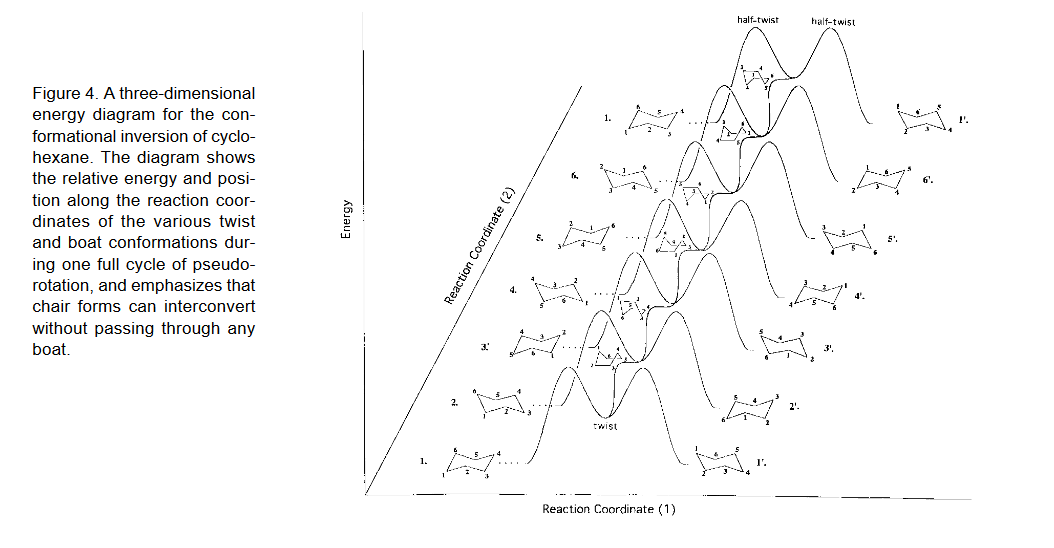

反応座標におけるエネルギーをプロットしてみよう。まずは、イス型からひずみボート型まで。
GMSの計算後、xyzファイルたちのコメントにkcal/mol単位で相対エネルギーが入っているため、それを利用する。

In [29]:
!rm -f cyclohexane.chair2twistboat.energy.csv a.????.xyz
!python3 splitxyz.py cyclohexane.chair2twistboat.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.chair2twistboat.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.chair2twistboat.energy.csv
!rm a.????.xyz
!cat cyclohexane.chair2twistboat.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
output: a.0025.xyz 
output: a.0026.xyz 
output: a.0027.xyz 
output: a.0028.xyz 
output: a.0029.xyz 
output: a.0030.xyz 
output: a.0031.xyz 
output: a.0032.xyz 
output: a.0033.xyz 
output: a.0034.xyz 
coordinate,energy
1,0.000000
2,0.115203
3,0.436702
4,0.938853
5,1.586966
6,2.358860
7,3.221773
8,4.146407
9,5.103821
10,6.065729
11,7.006791
12,7.905276
13,8.756681
14,9.509235
15,10.154569
16,10.687291
17,11.091238
18,11.361691
19,11.487887
20,11.473386
21,11.314139
22,11.043046
23,10.676147
24,10.

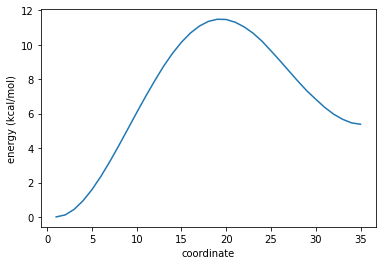

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("cyclohexane.chair2twistboat.energy.csv")
plt.plot(data['coordinate'], data['energy'])
plt.xlabel('coordinate')
plt.ylabel('energy (kcal/mol)')
plt.show()

上の図は左がイス型のシクロヘキサン、右が歪みボート型。もっともエネルギーが高いものが半イス型となっている。
遷移状態は、イス型と比べて11.5kcal/mol(=48.1kJ/mol)エネルギーが高い。ほぼwikipediaの値と一致した。
次に、ひずみボート型-ボート型のエネルギー差を求める。

In [31]:
!rm -f cyclohexane.tb2tb.energy.csv a.????.xyz
!python3 splitxyz.py cyclohexane.tbL2tbR.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2tb.energy.csv
!rm a.????.xyz
!cat cyclohexane.tb2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
output: a.0025.xyz 
output: a.0026.xyz 
output: a.0027.xyz 
output: a.0028.xyz 
output: a.0029.xyz 
output: a.0030.xyz 
output: a.0031.xyz 
output: a.0032.xyz 
output: a.0033.xyz 
output: a.0034.xyz 
coordinate,energy
1,0.000000
2,0.017124
3,0.064419
4,0.133294
5,0.219531
6,0.318030
7,0.424259
8,0.533105
9,0.628529
10,0.716379
11,0.808057
12,0.891050
13,0.965697
14,1.041474
15,1.097849
16,1.154393
17,1.193449
18,1.212669
19,1.203815
20,1.168022
21,1.114195
22,1.048672
23,0.970711
24,0.885653
25,

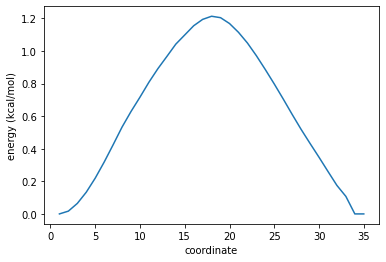

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy (kcal/mol)')
plt.plot(data['coordinate'], data['energy'])
plt.show()

左が歪みボート型、右も歪みボート型である。エネルギー障壁は以上のように1.2kcal/mol(=5kJ/mol)これもほぼwikipediaの値と一致した。

おまけ

失敗例。シクロヘキサンの歪みボート型-歪みボート型の遷移状態を求めようとして、とりあえず鏡像体を作り、二つの構造の重ね合わせを見ながら水素を入れ替えてみた (これもスクリプトなどで行うことはできなかった。つまり、シクロヘキサンのエカトリアル位とアキシアル位の水素が反転するのだろう、と仮定し、原子をそれに合うようにpymolで重ね合わせながら入れ替えた)。これが、cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyzである。しかしこれだと正六角型の遷移状態を経る。しかしエネルギー障壁が20kcal/molと高すぎるため、この遷移はほとんど起きないと考えられる。

In [33]:
!rm -f ./scartch/initial0000.xyz
!calculate_rmsd -p cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyz > l ; mv l cyclohexane.twistboatLng.xtb.xyz
!cat cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cp inpfileq_org inpfileq
!sed -i 's/^MIN_SPACING.*$/MIN_SPACING   2.0/' inpfileq
!sed -i 's/^NNODES.*$/NNODES      35/' inpfileq
!cat inpfileq

18
 
C         -0.6515298075       -1.2041425126        0.3952488082
C          0.6518632526       -1.2038873888       -0.3954005117
C          1.5157982497        0.0001190629        0.0001901396
C          0.6516255969        1.2041637605        0.3950972106
C         -0.6520049831        1.2039521182       -0.3952123095
C         -1.5157691903       -0.0002377042        0.0001087993
H         -2.1622289796       -0.2678434049       -0.8380688910
H         -2.1628193310        0.2668800435        0.8379751095
H         -0.4173462929        1.1646974597       -1.4607123495
H          1.2023143147        2.1293300919        0.2154268515
H          0.4170588669        1.1649289689        1.4605697006
H         -1.2030141752        2.1289829867       -0.2157585987
H          2.1623338203       -0.2673427064        0.8384147194
H          2.1628274492        0.2676194252       -0.8376713701
H         -1.2023432353       -2.1293676237        0.2161707973
H          0.4170763926       -1.16

In [34]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 2
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 35
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad i


 growing iter: 4 
 adding node: 4 between 3 31 
 iR,iP: 3 31 iN: 4  dqmag: 0.99 dq0[constraint]: -0.04 
 initial Hint ev: 0.035 0.036 0.037 0.051
 adding node: 30 between 31 4 
 iR,iP: 31 4 iN: 30  dqmag: 0.99 dq0[constraint]: -0.04 
 initial Hint ev: 0.035 0.036 0.037 0.051
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.60 0.58 0.58 0.58 3.03 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 3.03 0.58 0.58 0.58 0.60  disprms: 0.021 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-poin

 initial Hint ev: 0.035 0.035 0.037 0.051
 adding node: 28 between 29 6 
 iR,iP: 29 6 iN: 28  dqmag: 0.99 dq0[constraint]: -0.05 
 initial Hint ev: 0.035 0.035 0.037 0.051
 rpart:  0.08 0.08 0.08 0.08 0.08 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.08 0.08 0.08 0.08 0.08 0.00
 spacings (end ic_reparam, steps: 4):  0.60 0.59 0.59 0.58 0.58 0.60 2.80 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.80 0.59 0.58 0.58 0.59 0.59 0.60  disprms: 0.018 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The fol


 growing iter: 8 
 adding node: 8 between 7 27 
 iR,iP: 7 27 iN: 8  dqmag: 0.99 dq0[constraint]: -0.05 
 initial Hint ev: 0.035 0.035 0.036 0.051
 adding node: 26 between 27 8 
 iR,iP: 27 8 iN: 26  dqmag: 0.99 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.035 0.036 0.051
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.60 0.59 0.59 0.59 0.59 0.59 0.59 0.61 2.53 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.53 0.60 0.59 0.59 0.59 0.59 0.59 0.59 0.60  disprms: 0.022 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-poin

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Traceback (most recent call last):
  File "/opt/pubchemqc//pkg/bin/tm2orca.py", line 95, in <module>
    os.rename(u"gradient", basename + u".gradient")
OSError: [Errno 13] Permission denied
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal terminat


 growing iter: 11 
 adding node: 11 between 10 24 
 iR,iP: 10 24 iN: 11  dqmag: 1.00 dq0[constraint]: -0.08 
 initial Hint ev: 0.035 0.035 0.036 0.050
 adding node: 23 between 24 11 
 iR,iP: 24 11 iN: 23  dqmag: 1.00 dq0[constraint]: -0.08 
 initial Hint ev: 0.035 0.035 0.036 0.050
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.60 0.60 0.60 0.60 0.59 0.59 0.59 0.59 0.60 0.61 0.60 2.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.06 0.60 0.60 0.59 0.59 0.59 0.59 0.59 0.60 0.60 0.60 0.60  disprms: 0.018 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floati

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floatin

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signa

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.002 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 0.27 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.003 (DMAX: 0.100) predE: 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.002 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 0.27 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 1.01 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.006 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 2.12 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.007 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 3.54 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 5.17 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 6.96 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.007 (DMAX: 0.100) predE: -0.00  E(M): 8.84 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.008 (DMAX: 0.100) predE: -0.01  E(M): 10.74 gRMS: 0.0002 * 
 
 O

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.002 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 0.28 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 1.02 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.006 ss: 0.002 (DMAX: 0.100) predE: -0.00  E(M): 2.15 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.007 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 3.57 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 5.22 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 7.01 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 8.90 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.007 (DMAX: 0.100) predE: -0.00  E(M): 10.81 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.008 (DMAX: 0.100) predE: -0.00  E(M): 12.69 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.0

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floatin

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point except


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The fo

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG

 mag/DTHRESH: 0.000491 0.000050 lamb/lambp: -0.003 0.000 
 mag/DTHRESH: 0.000799 0.000050 lamb/lambp: -0.003 0.000 
 mag/DTHRESH: 0.001046 0.000050 lamb/lambp: -0.003 0.000 

 Davidson iteration 2 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of

In [35]:
!cp scratch/tsq0000.xyz cyclohexane.hex.xtb.xyz

In [36]:
view = JsmolView.from_file("cyclohexane.hex.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

これは正六角形をもった新しい遷移状態ではないか、とも思えるが、エネルギー障壁は21.3kcal/molもあるため、この経路はほとんど起こらないだろう。

In [37]:
!cp stringfile.xyz0000 cyclohexane.tb2hex2tb.xtb.xyz

まずは歪みボート型から六角型を経て歪みボート型に移る経路を見てみる。

In [38]:
!rm -f a.????.xyz cyclohexane.tb2hex2tb.energy.csv
!python3 splitxyz.py cyclohexane.tb2hex2tb.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2hex2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2hex2tb.energy.csv
!cat cyclohexane.tb2hex2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
output: a.0025.xyz 
output: a.0026.xyz 
output: a.0027.xyz 
output: a.0028.xyz 
output: a.0029.xyz 
output: a.0030.xyz 
output: a.0031.xyz 
output: a.0032.xyz 
output: a.0033.xyz 
output: a.0034.xyz 
coordinate,energy
1,0.000000
2,0.267146
3,0.999043
4,2.107547
5,3.513686
6,5.145977
7,6.931528
8,8.809146
9,10.717574
10,12.599202
11,14.400880
12,16.079938
13,17.576589
14,18.859123
15,19.898922
16,20.656660
17,21.124154
18,21.281117
19,21.122798
20,20.663311
21,19.909320
22,18.871234
23,17.591925


In [39]:
view = JsmolView()
display(view)
view.load('cyclohexane.tb2hex2tb.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

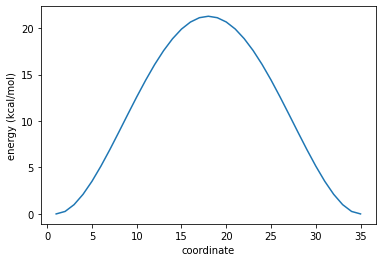

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2hex2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy (kcal/mol)')
plt.plot(data['coordinate'], data['energy'])
plt.show()

お疲れさまでした。以上